# Sentiment Analysis - Amazon Alexa Reviews

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations.
For this short project, I am going to show how to analyze the sentiments of customers who use Amazon Alexa using VADER.

In [1]:
# import necessary libraries and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.simplefilter('ignore')

In [2]:
# import dataset
data = pd.read_csv("amazon_alexa.tsv", delimiter='\t')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<AxesSubplot:xlabel='rating', ylabel='count'>

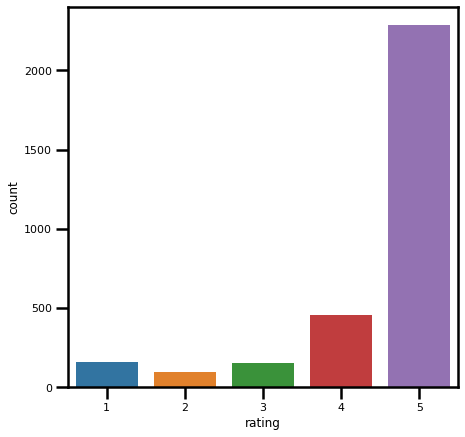

In [5]:
# let's explore the rating variable
sns.set_context('poster', font_scale = 0.5)
plt.figure(figsize=(7, 7))
sns.countplot(data['rating'])

<AxesSubplot:xlabel='feedback', ylabel='count'>

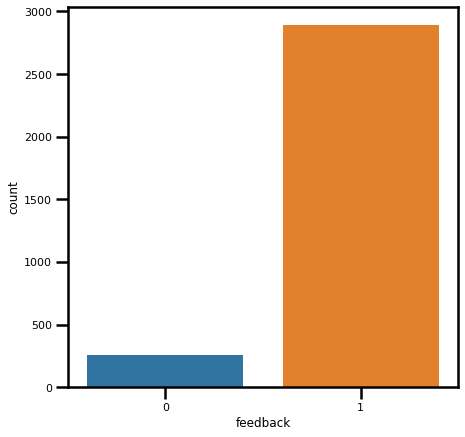

In [6]:
#check out the feedback variable
plt.figure(figsize=(7, 7))
sns.countplot(data['feedback'])

In [7]:
# adding polarity score columns based on "verified_reviews"
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["verified_reviews"]]

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback,Positive,Negative,Neutral,Compound
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,0.692,0.000,0.308,0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,0.807,0.000,0.193,0.6360
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,0.114,0.102,0.784,-0.1280
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,0.383,0.000,0.617,0.9169
4,5,31-Jul-18,Charcoal Fabric,Music,1,0.000,0.000,1.000,0.0000


In [9]:
a = sum(data["Positive"])
b = sum(data["Negative"])
c = sum(data["Neutral"])
d = sum(data["Compound"])

reviews = {'Sentiment Score':['Positive', 'Negative', 'Neutral', 'Compound'], 'Review':[a, b, c, d]}
reviews_df = pd.DataFrame(reviews)
reviews_df

,Sentiment Score,Review
0,Positive,1035.3720
1,Negative,96.9000
2,Neutral,1936.7320
3,Compound,1664.5543


<AxesSubplot:xlabel='Sentiment Score'>

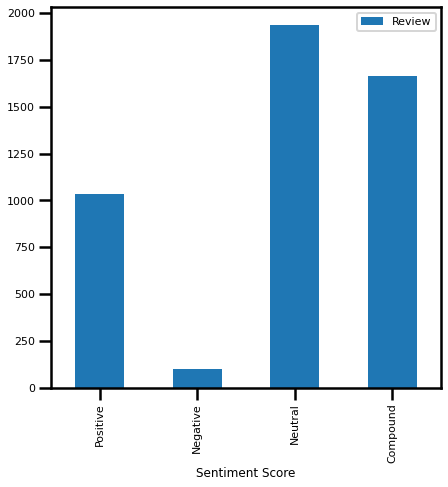

In [10]:
# let's plot the sentiment scores - overall, the reviews are mostly neutral and very little negative
reviews_df.plot(x = "Sentiment Score", y = "Review", kind = 'bar', figsize=(7,7))

In [11]:
# grouping by feedback
data.groupby('feedback')['Compound'].describe()

,count,mean,std,min,25%,50%,75%,max
feedback,,,,,,,,
0,257.0,-0.000633,0.477503,-0.9433,-0.4015,0.0000,0.4019,0.9654
1,2893.0,0.575429,0.346449,-0.9910,0.4391,0.6588,0.8402,0.9979


<AxesSubplot:title={'center':'Compound'}, xlabel='feedback'>

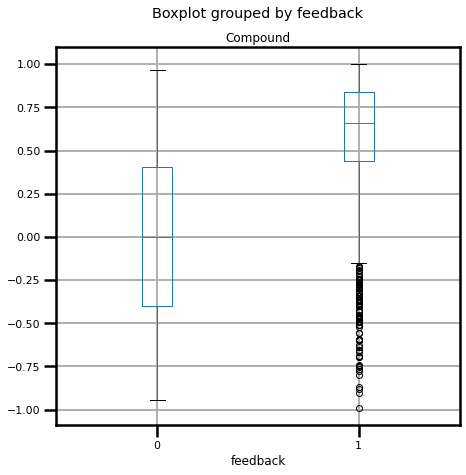

In [12]:
data.boxplot(by='feedback', column='Compound', figsize=(7,7))

**Conclusion:** Overall, customers have neutral experience with Amazon Alexa, over 1000 reviews are positive and only about ~97 out of 3150 reviews are negative. 